# Import Packages/Codes

In [1]:
%load_ext google.cloud.bigquery
from datetime import date
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil
from IPython.display import display, HTML
import os
import subprocess

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [2]:
dataset = os.getenv("WORKSPACE_CDR")
dataset

'fc-aou-cdr-prod-ct.C2022Q4R9'

In [3]:
cwd = os.getcwd()
cwd

'/home/jupyter/workspaces/ckdgenomicsv7'

# Build Acidosis Cohort

## Obtain data

In [4]:
# Find the ICD condition codes for acidosis 
#Acidosis
acidosis = {'9': ['276.2'], 
       '10': ['E87.2']}

In [ ]:
# Obtain demographics data

In [5]:
# This snippet assumes you run setup first

# This code copies file in your Google Bucket and loads it into a dataframe

# Replace 'test.csv' with THE NAME of the file you're going to download from the bucket (don't delete the quotation marks)
name_of_file_in_bucket = 'demographic_all.csv'

########################################################################
##
################# DON'T CHANGE FROM HERE ###############################
##
########################################################################

# get the bucket name
my_bucket = os.getenv('WORKSPACE_BUCKET')

# copy csv file from the bucket to the current working space
os.system(f"gsutil cp '{my_bucket}/data/{name_of_file_in_bucket}' .")

print(f'[INFO] {name_of_file_in_bucket} is successfully downloaded into your working space')
# save dataframe in a csv file in the same workspace as the notebook
demo_patients = pd.read_csv(name_of_file_in_bucket)
demo_patients

Copying gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/demographic_all.csv...
- [1 files][ 59.8 MiB/ 59.8 MiB]                                                
Operation completed over 1 objects/59.8 MiB.                                     


[INFO] demographic_all.csv is successfully downloaded into your working space


,person_id,gender_concept_id,gender_source_value,gender_source_concept_id,sex_at_birth_concept_id,sex_at_birth_source_value,sex_at_birth_source_concept_id,race_concept_id,race_source_value,race_source_concept_id,ethnicity_concept_id,ethnicity_source_value,ethnicity_source_concept_id,year_of_birth
0,1312608,903096,PMI_Skip,903096,45878463,SexAtBirth_Female,1585847,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1991
1,3118398,903096,PMI_Skip,903096,903096,PMI_Skip,903096,2000000008,WhatRaceEthnicity_GeneralizedMultPopulations,2000000008,38003564,Not Hispanic,38003564,1999
2,1138944,903096,PMI_Skip,903096,45878463,SexAtBirth_Female,1585847,8516,WhatRaceEthnicity_Black,1586143,38003564,Not Hispanic,38003564,1942
3,7823553,903096,PMI_Skip,903096,45880669,SexAtBirth_Male,1585846,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1944
4,1414484,903096,PMI_Skip,903096,0,No matching concept,0,903096,PMI_Skip,903096,903096,PMI_Skip,903096,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413452,3262188,2000000002,GenderIdentity_GeneralizedDiffGender,2000000002,45880669,SexAtBirth_Male,1585846,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1986
413453,1826726,2000000002,GenderIdentity_GeneralizedDiffGender,2000000002,45878463,SexAtBirth_Female,1585847,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1995
413454,1725447,2000000002,GenderIdentity_GeneralizedDiffGender,2000000002,45880669,SexAtBirth_Male,1585846,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1973
413455,3532126,2000000002,GenderIdentity_GeneralizedDiffGender,2000000002,45878463,SexAtBirth_Female,1585847,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1988


In [ ]:
# Obtain medication data

In [6]:
# This snippet assumes you run setup first

# This code copies file in your Google Bucket and loads it into a dataframe

# Replace 'test.csv' with THE NAME of the file you're going to download from the bucket (don't delete the quotation marks)
name_of_file_in_bucket = 'Metformin_Medication_AG_10122023.csv'

########################################################################
##
################# DON'T CHANGE FROM HERE ###############################
##
########################################################################

# get the bucket name
my_bucket = os.getenv('WORKSPACE_BUCKET')

# copy csv file from the bucket to the current working space
os.system(f"gsutil cp '{my_bucket}/data/{name_of_file_in_bucket}' .")

print(f'[INFO] {name_of_file_in_bucket} is successfully downloaded into your working space')
# save dataframe in a csv file in the same workspace as the notebook
df_med = pd.read_csv(name_of_file_in_bucket)
df_med

Copying gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/Metformin_Medication_AG_10122023.csv...
/ [1 files][157.6 MiB/157.6 MiB]                                                
Operation completed over 1 objects/157.6 MiB.                                    


[INFO] Metformin_Medication_AG_10122023.csv is successfully downloaded into your working space


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (20,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,person_id,drug_concept_id,standard_concept_name,standard_concept_code,standard_vocabulary,drug_exposure_start_datetime,drug_exposure_end_datetime,verbatim_end_date,drug_type_concept_id,drug_type_concept_name,...,lot_number,visit_occurrence_id,visit_occurrence_concept_name,drug_source_value,drug_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,route_source_value,dose_unit_source_value
0,5987501,40163928,24 HR metformin hydrochloride 750 MG Extended ...,860981,RxNorm,2020-06-29 12:37:56+00:00,2020-07-29 12:37:56+00:00,NaN,38000175,Prescription dispensed in pharmacy,...,NaN,NaN,NaN,4032912,1608422.0,"METFORMIN HCL 750MG 24HR TAB,SA",4032912,VANDF,26643006,NaN
1,2602985,40163928,24 HR metformin hydrochloride 750 MG Extended ...,860981,RxNorm,2021-01-16 10:03:58+00:00,2021-02-15 10:03:58+00:00,NaN,38000175,Prescription dispensed in pharmacy,...,NaN,NaN,NaN,4032912,1608422.0,"METFORMIN HCL 750MG 24HR TAB,SA",4032912,VANDF,26643006,NaN
2,5987501,40163928,24 HR metformin hydrochloride 750 MG Extended ...,860981,RxNorm,2018-03-27 07:02:00+00:00,2018-06-25 07:02:00+00:00,NaN,38000175,Prescription dispensed in pharmacy,...,NaN,NaN,NaN,4032912,1608422.0,"METFORMIN HCL 750MG 24HR TAB,SA",4032912,VANDF,26643006,NaN
3,2811067,40163928,24 HR metformin hydrochloride 750 MG Extended ...,860981,RxNorm,2018-12-28 07:33:52+00:00,2019-01-27 07:33:52+00:00,NaN,38000175,Prescription dispensed in pharmacy,...,NaN,NaN,NaN,4032912,1608422.0,"METFORMIN HCL 750MG 24HR TAB,SA",4032912,VANDF,26643006,NaN
4,1088840,40164930,metformin hydrochloride 500 MG Oral Tablet [Gl...,861008,RxNorm,2015-11-05 21:46:50.900000+00:00,2016-01-29 19:41:23.300000+00:00,NaN,32839,EHR prescription issue record,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26643006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609675,9200668,1503297,metformin,6809,RxNorm,2013-06-14 00:00:00+00:00,2014-04-07 00:00:00+00:00,NaN,38000177,Prescription written,...,NaN,4.400000e+16,Outpatient Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
609676,2281709,1503297,metformin,6809,RxNorm,2014-01-06 00:00:00+00:00,2014-09-04 00:00:00+00:00,NaN,38000177,Prescription written,...,NaN,4.400000e+16,Outpatient Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
609677,1506610,1503297,metformin,6809,RxNorm,2017-12-12 00:00:00+00:00,2018-04-06 00:00:00+00:00,2018-04-06,38000177,Prescription written,...,NaN,NaN,NaN,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
609678,1139837,1503297,metformin,6809,RxNorm,2020-12-09 00:00:00+00:00,2020-12-09 00:00:00+00:00,NaN,38000177,Prescription written,...,NaN,4.400000e+16,Outpatient Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN


In [7]:
df_med['person_id'].nunique()

33353

## Construct Where Statement (SQL, matching ICD codes)

In [8]:
# ICD and diag code for Where statement
def where_sub_sql(codes_dict, num):
    sub_where = "(("   
    # get the diag LIKE ... OR diag LIKE ...
    for i, code in enumerate(list(codes_dict[num])):
        if i != 0: # Skip adding "OR" in the first code
            sub_where += "OR "
        sub_where += f"concept_code LIKE '{code}%' "
    sub_where += f") AND vocabulary_id = 'ICD{num}CM'"
    sub_where += ")"
    return sub_where

In [9]:
# get the where condition for the codes_dict
def where_sql(codes_dict):
    # get the sub where condition when icd_flag = '9'
    where_sql = where_sub_sql(codes_dict, '9')
    where_sql += " OR "
    # get the sub where condition when icd_flag = '10'
    where_sql += where_sub_sql(codes_dict, '10')
    where_sql += ")"
    return where_sql

In [10]:
where_condition = where_sql(acidosis)
print(where_condition)

((concept_code LIKE '276.2%' ) AND vocabulary_id = 'ICD9CM') OR ((concept_code LIKE 'E87.2%' ) AND vocabulary_id = 'ICD10CM'))


## 2.3. Function to Query Patients by ICD 9&10 Major Type

In [11]:
#Query person ids and condition start dates by specific ICD 9&10 diagnosis codes.
def query_by_icd(where_statement):  
    query = ("""
                SELECT distinct person_id, condition_start_date as date, concept_code, vocabulary_id  
                FROM 
                    (SELECT DISTINCT person_id, condition_source_concept_id, condition_source_value, condition_start_date
                        FROM `"""+dataset+""".condition_occurrence`) AS cond 
                     INNER JOIN 
                        (SELECT DISTINCT concept_id, concept_name, concept_code, vocabulary_id 
                            FROM `"""+dataset+""".concept` 
                            where """+where_statement+""" as concept
                            on concept.concept_id = cond.condition_source_concept_id
    """)
    df_condition= pd.read_gbq(query, dialect="standard")
    return df_condition

In [12]:
df_diagnostic_condition = query_by_icd(where_condition)
df_diagnostic_condition

,person_id,date,concept_code,vocabulary_id
0,2876122,2007-07-20,276.2,ICD9CM
1,1127116,2004-05-19,276.2,ICD9CM
2,2332655,2011-11-30,276.2,ICD9CM
3,3268529,2013-07-12,276.2,ICD9CM
4,1540474,2006-01-14,276.2,ICD9CM
...,...,...,...,...
37464,2635384,2020-07-18,E87.2,ICD10CM
37465,9398989,2018-10-12,E87.2,ICD10CM
37466,2506446,2021-09-17,E87.2,ICD10CM
37467,1033536,2020-02-25,E87.2,ICD10CM


In [13]:
# Only see records in ICD 9 vocabulary
df_diagnostic_condition[df_diagnostic_condition['vocabulary_id'] == 'ICD9CM']

,person_id,date,concept_code,vocabulary_id
0,2876122,2007-07-20,276.2,ICD9CM
1,1127116,2004-05-19,276.2,ICD9CM
2,2332655,2011-11-30,276.2,ICD9CM
3,3268529,2013-07-12,276.2,ICD9CM
4,1540474,2006-01-14,276.2,ICD9CM
...,...,...,...,...
6288,3483899,2014-02-20,276.2,ICD9CM
6289,3511185,2015-09-24,276.2,ICD9CM
6290,3012293,2016-02-29,276.2,ICD9CM
6291,1689730,2015-10-27,276.2,ICD9CM


In [14]:
# Only see records in ICD 10 vocabulary
df_diagnostic_condition[df_diagnostic_condition['vocabulary_id'] == 'ICD10CM']

,person_id,date,concept_code,vocabulary_id
6293,1276646,2021-10-01,E87.2,ICD10CM
6294,2597712,2020-12-27,E87.2,ICD10CM
6295,3009240,2018-06-04,E87.2,ICD10CM
6296,2594637,2016-10-18,E87.2,ICD10CM
6297,2814169,2016-06-20,E87.2,ICD10CM
...,...,...,...,...
37464,2635384,2020-07-18,E87.2,ICD10CM
37465,9398989,2018-10-12,E87.2,ICD10CM
37466,2506446,2021-09-17,E87.2,ICD10CM
37467,1033536,2020-02-25,E87.2,ICD10CM


## 2.4. Function to Sort Unique Patients by the Earliest Date

In [15]:
#Sort unique person ids by their earliset condition date.
def sort_unique_by_min_date(df): 
    min_dates_diags = df.sort_values(["person_id","date"]).groupby("person_id", as_index=False).first()
    return min_dates_diags

In [16]:
min_dates_diags = sort_unique_by_min_date(df_diagnostic_condition)
min_dates_diags

,person_id,date,concept_code,vocabulary_id
0,1000234,2007-09-25,276.2,ICD9CM
1,1000280,2021-09-22,E87.2,ICD10CM
2,1000570,2017-01-15,E87.2,ICD10CM
3,1000612,2018-09-29,E87.2,ICD10CM
4,1000640,2019-04-07,E87.2,ICD10CM
...,...,...,...,...
13825,9985655,2021-01-01,E87.2,ICD10CM
13826,9987547,2021-02-27,E87.2,ICD10CM
13827,9988275,2021-12-07,E87.2,ICD10CM
13828,9996889,2010-01-25,276.2,ICD9CM


# Construct Final dataset

In [17]:
min_dates_diags = pd.merge(min_dates_diags, demo_patients, on ="person_id")
min_dates_diags

,person_id,date,concept_code,vocabulary_id,gender_concept_id,gender_source_value,gender_source_concept_id,sex_at_birth_concept_id,sex_at_birth_source_value,sex_at_birth_source_concept_id,race_concept_id,race_source_value,race_source_concept_id,ethnicity_concept_id,ethnicity_source_value,ethnicity_source_concept_id,year_of_birth
0,1000234,2007-09-25,276.2,ICD9CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1927
1,1000280,2021-09-22,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1958
2,1000570,2017-01-15,E87.2,ICD10CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1952
3,1000612,2018-09-29,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,8516,WhatRaceEthnicity_Black,1586143,38003564,Not Hispanic,38003564,1969
4,1000640,2019-04-07,E87.2,ICD10CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13825,9985655,2021-01-01,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,2100000001,AoUDRC_NoneIndicated,0,38003563,Hispanic,38003563,1949
13826,9987547,2021-02-27,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,2100000001,AoUDRC_NoneIndicated,0,38003563,Hispanic,38003563,1946
13827,9988275,2021-12-07,E87.2,ICD10CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,8527,WhatRaceEthnicity_White,1586146,38003564,Not Hispanic,38003564,1967
13828,9996889,2010-01-25,276.2,ICD9CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,8516,WhatRaceEthnicity_Black,1586143,38003564,Not Hispanic,38003564,1957


In [18]:
# Filter patients who used metformin drugs
min_dates_diags = pd.merge(min_dates_diags, df_med, on ="person_id", how='inner')
min_dates_diags

,person_id,date,concept_code,vocabulary_id,gender_concept_id,gender_source_value,gender_source_concept_id,sex_at_birth_concept_id,sex_at_birth_source_value,sex_at_birth_source_concept_id,...,lot_number,visit_occurrence_id,visit_occurrence_concept_name,drug_source_value,drug_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,route_source_value,dose_unit_source_value
0,1003280,2016-11-28,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN
1,1003409,2015-07-25,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.200000e+16,Office Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
2,1003409,2015-07-25,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.200000e+16,Office Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
3,1003409,2015-07-25,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.200000e+16,Office Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
4,1003409,2015-07-25,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.200000e+16,Office Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58018,9897410,2019-11-26,E87.2,ICD10CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,...,NaN,NaN,NaN,4032913.0,1608423.0,"METFORMIN HCL 500MG 24HR TAB,SA",4032913.0,VANDF,26643006.0,NaN
58019,9910205,2022-05-30,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN
58020,9976812,2021-03-05,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,7.000000e+15,Office Visit,860975.0,40163924.0,24 HR metformin hydrochloride 500 MG Extended ...,860975.0,RxNorm,26643006,NaN
58021,9976812,2021-03-05,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,7.000000e+15,NaN,861004.0,40164897.0,metformin hydrochloride 1000 MG Oral Tablet,861004.0,RxNorm,26643006.0,NaN


In [19]:
min_dates_diags['person_id'].nunique()

3169

In [21]:
metformin_acidosis_AG_10132023 = min_dates_diags.drop_duplicates(subset='person_id',keep='first')
metformin_acidosis_AG_10132023

,person_id,date,concept_code,vocabulary_id,gender_concept_id,gender_source_value,gender_source_concept_id,sex_at_birth_concept_id,sex_at_birth_source_value,sex_at_birth_source_concept_id,...,lot_number,visit_occurrence_id,visit_occurrence_concept_name,drug_source_value,drug_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,route_source_value,dose_unit_source_value
0,1003280,2016-11-28,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN
1,1003409,2015-07-25,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.200000e+16,Office Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
7,1004250,2010-02-23,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.700000e+16,Outpatient Visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,1005021,2018-04-07,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN
50,1006228,2014-04-28,276.2,ICD9CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,...,NaN,2.200000e+16,Outpatient Visit,861008.0,40164930.0,metformin hydrochloride 500 MG Oral Tablet [Gl...,861008.0,RxNorm,26643006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57931,9717648,2020-11-16,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,7.000000e+15,Inpatient Visit,63739064010.0,45875175.0,metformin hydrochloride 500 MG Oral Tablet,63739064010.0,NDC,26643006,NaN
57961,9766863,2021-08-06,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,9.000000e+15,Outpatient Visit,861010.0,40164946.0,metformin hydrochloride 850 MG Oral Tablet,861010.0,RxNorm,26643006,NaN
57962,9897410,2019-11-26,E87.2,ICD10CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,...,NaN,NaN,NaN,4012735,42563481.0,METFORMIN HCL 500MG TAB,4012735,VANDF,26643006,NaN
58019,9910205,2022-05-30,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN


In [22]:
metformin_acidosis_AG_10132023 = metformin_acidosis_AG_10132023.reset_index(drop=True)
metformin_acidosis_AG_10132023

,person_id,date,concept_code,vocabulary_id,gender_concept_id,gender_source_value,gender_source_concept_id,sex_at_birth_concept_id,sex_at_birth_source_value,sex_at_birth_source_concept_id,...,lot_number,visit_occurrence_id,visit_occurrence_concept_name,drug_source_value,drug_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,route_source_value,dose_unit_source_value
0,1003280,2016-11-28,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN
1,1003409,2015-07-25,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.200000e+16,Office Visit,6809,1503297.0,metformin,6809,RxNorm,26643006,NaN
2,1004250,2010-02-23,276.2,ICD9CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,2.700000e+16,Outpatient Visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1005021,2018-04-07,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN
4,1006228,2014-04-28,276.2,ICD9CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,...,NaN,2.200000e+16,Outpatient Visit,861008.0,40164930.0,metformin hydrochloride 500 MG Oral Tablet [Gl...,861008.0,RxNorm,26643006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,9717648,2020-11-16,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,7.000000e+15,Inpatient Visit,63739064010.0,45875175.0,metformin hydrochloride 500 MG Oral Tablet,63739064010.0,NDC,26643006,NaN
3165,9766863,2021-08-06,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,9.000000e+15,Outpatient Visit,861010.0,40164946.0,metformin hydrochloride 850 MG Oral Tablet,861010.0,RxNorm,26643006,NaN
3166,9897410,2019-11-26,E87.2,ICD10CM,45880669,GenderIdentity_Man,1585839,45880669,SexAtBirth_Male,1585846,...,NaN,NaN,NaN,4012735,42563481.0,METFORMIN HCL 500MG TAB,4012735,VANDF,26643006,NaN
3167,9910205,2022-05-30,E87.2,ICD10CM,45878463,GenderIdentity_Woman,1585840,45878463,SexAtBirth_Female,1585847,...,NaN,4.600000e+16,NaN,NaN,6850.0,NaN,NaN,NaN,26643006,NaN


In [ ]:
# Upload dataset to Google Bucket

In [23]:
# This snippet assumes you run setup first

# This code saves your dataframe into a csv file in a "data" folder in Google Bucket

# Replace df with THE NAME OF YOUR DATAFRAME
my_dataframe = metformin_acidosis_AG_10132023   

# Replace 'test.csv' with THE NAME of the file you're going to store in the bucket (don't delete the quotation marks)
destination_filename = 'metformin_acidosis_AG_10132023.csv'

########################################################################
##
################# DON'T CHANGE FROM HERE ###############################
##
########################################################################

# save dataframe in a csv file in the same workspace as the notebook
my_dataframe.to_csv(destination_filename, index=False)

# get the bucket name
my_bucket = os.getenv('WORKSPACE_BUCKET')

# copy csv file to the bucket
args = ["gsutil", "cp", f"./{destination_filename}", f"{my_bucket}/data/"]
output = subprocess.run(args, capture_output=True)

# print output from gsutil
output.stderr

b'Copying file://./metformin_acidosis_AG_10132023.csv [Content-Type=text/csv]...\n/ [0 files][    0.0 B/  1.4 MiB]                                                \r-\r- [1 files][  1.4 MiB/  1.4 MiB]                                                \r\nOperation completed over 1 objects/1.4 MiB.                                      \n'

In [24]:
# This snippet assumes that you run setup first

# This code lists objects in your Google Bucket

# Get the bucket name
my_bucket = os.getenv('WORKSPACE_BUCKET')

# List objects in the bucket
print(subprocess.check_output(f"gsutil ls -r {my_bucket}", shell=True).decode('utf-8'))

gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/:
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/Metformin_Cases_AG_10122023.parquet.gzip
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/Metformin_Medication_AG_10122023.csv
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/Metformin_Medication_Min_Date_AG_10122023.csv
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/demographic_all.csv
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/data/metformin_acidosis_AG_10132023.csv

gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/notebooks/:
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/notebooks/01_ALD Cohort Creation.ipynb
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/notebooks/01_AUD Cohort Creation.ipynb
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/notebooks/02_ALD WGS_Cohort.ipynb
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/notebooks/02_AUD WGS_Cohort.ipynb
gs://fc-secure-d1513326-a1dd-4161-9188-1bb4e9c42204/notebo

# Visualizations

## Clean data

In [25]:
cleaned_demo = metformin_acidosis_AG_10132023[['person_id','year_of_birth','gender_source_value','sex_at_birth_source_value','race_source_value', 'ethnicity_source_value']]


cleaned_demo = cleaned_demo.rename(columns={'person_id':"Count",
                                            'year_of_birth':"Age",
                                            'gender_source_value': "Gender",
                                            'sex_at_birth_source_value':"Sex at Birth",
                                            'race_source_value':"Race",
                                            'ethnicity_source_value':"Hispanic"})


for row in (range(cleaned_demo.shape[0])):
    for col in (range(cleaned_demo.shape[1])):
        if cleaned_demo.iloc[row,col] == "PMI_Skip":
            cleaned_demo.iloc[row,col] = "Skip"
        if cleaned_demo.iloc[row,col] in ["PMI_PreferNotToAnswer",
                                          "SexAtBirth_Intersex",
                                          "SexAtBirth_SexAtBirthNoneOfThese",
                                          "No matching concept",
                                          "GenderIdentity_AdditionalOptions",
                                          "GenderIdentity_GeneralizedDiffGender",
                                          "GenderIdentity_NonBinary",
                                          "GenderIdentity_Transgender"]:
            cleaned_demo.iloc[row,col] = "Unspecified"


for x in range(len(cleaned_demo)):
    birth_year = cleaned_demo.at[x,'Age']
    cleaned_demo.at[x,'Age'] = date.today().year - birth_year

bins = [0,29,49,69,89,1000]
labels = ['0-29','30-49','50-69','70-89','90+']
cleaned_demo['Age Group'] = pd.cut(cleaned_demo['Age'], bins=bins, labels=labels, right=False)

In [26]:
cleaned_demo

,Count,Age,Gender,Sex at Birth,Race,Hispanic,Age Group
0,1003280,71,GenderIdentity_Woman,SexAtBirth_Female,AoUDRC_NoneIndicated,Hispanic,70-89
1,1003409,34,GenderIdentity_Woman,SexAtBirth_Female,WhatRaceEthnicity_White,Not Hispanic,30-49
2,1004250,73,GenderIdentity_Woman,SexAtBirth_Female,WhatRaceEthnicity_White,Not Hispanic,70-89
3,1005021,26,GenderIdentity_Woman,SexAtBirth_Female,AoUDRC_NoneIndicated,Hispanic,0-29
4,1006228,81,GenderIdentity_Man,SexAtBirth_Male,WhatRaceEthnicity_RaceEthnicityNoneOfThese,WhatRaceEthnicity_RaceEthnicityNoneOfThese,70-89
...,...,...,...,...,...,...,...
3164,9717648,67,GenderIdentity_Woman,SexAtBirth_Female,WhatRaceEthnicity_Black,Not Hispanic,50-69
3165,9766863,64,GenderIdentity_Woman,SexAtBirth_Female,AoUDRC_NoneIndicated,Hispanic,50-69
3166,9897410,59,GenderIdentity_Man,SexAtBirth_Male,WhatRaceEthnicity_Black,Not Hispanic,50-69
3167,9910205,52,GenderIdentity_Woman,SexAtBirth_Female,WhatRaceEthnicity_Black,Not Hispanic,50-69


## Sex at Birth & Gender IdentityNew heading

,Sex at Birth,Count,%
0,SexAtBirth_Female,1664,52.508678
1,SexAtBirth_Male,1439,45.408646
2,Skip,39,1.230672
3,Unspecified,27,0.852004


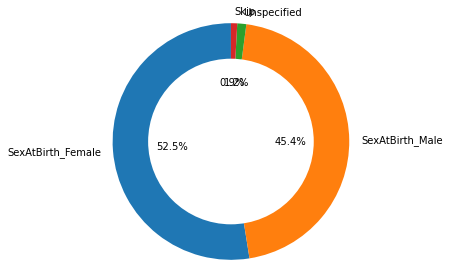

In [27]:
count_sex_gr = cleaned_demo[['Count','Sex at Birth']].groupby(['Sex at Birth'], as_index=False).count()
count_sex_gr['%'] = 100 * count_sex_gr['Count'] / len(cleaned_demo)
display(count_sex_gr)

fig1, ax1 = plt.subplots()
ax1.pie(cleaned_demo['Sex at Birth'].value_counts(), labels=['SexAtBirth_Female','SexAtBirth_Male','Unspecified','Skip'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax1.axis('equal')
fig = plt.gcf().gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.tight_layout()
#rcParams['figure.figsize'] = (10,10)
plt.show()

,Gender,Count,%
0,GenderIdentity_Man,1436,45.313979
1,GenderIdentity_Woman,1659,52.350899
2,Skip,56,1.767119
3,Unspecified,18,0.568003


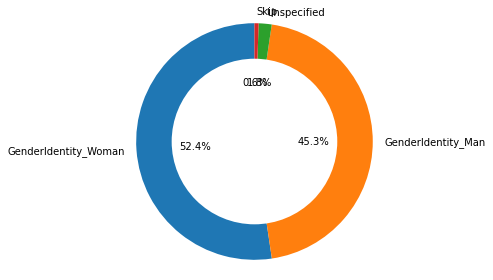

In [28]:
count_gender_gr = cleaned_demo[['Count','Gender']].groupby(['Gender'], as_index=False).count()
count_gender_gr['%'] = 100 * count_gender_gr['Count'] / len(cleaned_demo)
display(count_gender_gr)

fig1, ax1 = plt.subplots()
ax1.pie(cleaned_demo['Gender'].value_counts(), labels=['GenderIdentity_Woman','GenderIdentity_Man','Unspecified','Skip'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax1.axis('equal')
fig = plt.gcf().gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.tight_layout()
#rcParams['figure.figsize'] = (10,10)
plt.show()

## Race and Ancestry

,Race,Count,%
0,AoUDRC_NoneIndicated,732,23.098769
1,Skip,66,2.082676
2,Unspecified,26,0.820448
3,WhatRaceEthnicity_Asian,38,1.199116
4,WhatRaceEthnicity_Black,893,28.179236
5,WhatRaceEthnicity_GeneralizedMultPopulations,31,0.978227
6,WhatRaceEthnicity_MENA,13,0.410224
7,WhatRaceEthnicity_NHPI,7,0.220890
8,WhatRaceEthnicity_RaceEthnicityNoneOfThese,39,1.230672
9,WhatRaceEthnicity_White,1324,41.779741


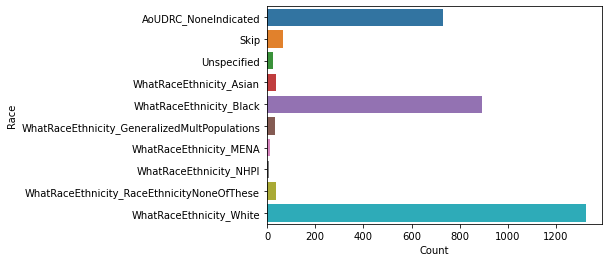

In [29]:
count_race_gr = cleaned_demo[['Count','Race']].groupby(['Race'], as_index=False).count()
count_race_gr['%'] = 100 * count_race_gr['Count'] / len(cleaned_demo)
display(count_race_gr)

sns.barplot(x='Count', y='Race',data=cleaned_demo[['Count','Race']].groupby(['Race'], as_index=False).count());

## Ethnicity

,Hispanic,Count,%
0,Hispanic,789,24.897444
1,Not Hispanic,2249,70.968760
2,Skip,66,2.082676
3,Unspecified,26,0.820448
4,WhatRaceEthnicity_RaceEthnicityNoneOfThese,39,1.230672


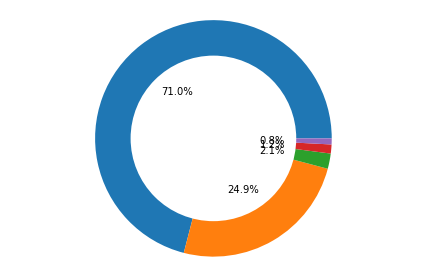

In [30]:
count_eth_gr = cleaned_demo[['Count','Hispanic']].groupby(['Hispanic'], as_index=False).count()
count_eth_gr['%'] = 100 * count_eth_gr['Count'] / len(cleaned_demo)
display(count_eth_gr)

fig1, ax1 = plt.subplots()
ax1.pie(cleaned_demo['Hispanic'].value_counts(),  #labels=['Not HLS','Hispanic, Latino, or Spanish', 'Skip', 'None of These', 'Prefer not to Answer'],
        autopct='%1.1f%%', startangle=0, pctdistance=0.5)
ax1.axis('equal')
fig = plt.gcf().gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.tight_layout()
#rcParams['figure.figsize'] = (10,10)
plt.show();

## Age Distribution

,Age Group,Count,%
0,0-29,18,0.568003
1,30-49,394,12.432944
2,50-69,1650,52.066898
3,70-89,1076,33.953929
4,90+,31,0.978227


,min,25%,50%,75%,max
Age Group,,,,,
0-29,23.0,25.25,26.0,28.0,28.0
30-49,29.0,38.00,42.0,45.0,48.0
50-69,49.0,56.00,61.0,65.0,68.0
70-89,69.0,71.00,75.0,78.0,88.0
90+,89.0,90.00,91.0,93.0,97.0


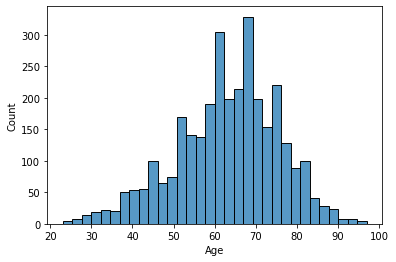

In [31]:
count_age_gr = cleaned_demo[['Count','Age Group']].groupby(['Age Group'], as_index=False).count()
count_age_gr['%'] = 100 * count_age_gr['Count'] / len(cleaned_demo)
display(count_age_gr)


#rcParams['figure.figsize'] = (20,10)
sns.histplot(cleaned_demo['Age']);

summary = cleaned_demo.groupby('Age Group')['Age'].describe()[['min', '25%', '50%', '75%', 'max']]
summary